In [38]:
from astropy import coordinates as coords
from astropy import units as u 
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [22]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
result = SDSS.query_region(co, spectro=True, radius=2*u.arcsec)
spec = SDSS.get_spectra(matches=result)
print(spec)

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa0504b3e20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa050316c50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa010bf7760>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa010bf7880>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa0504f93f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa0504f9ba0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa010b6b7f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa0504b1030>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa05051c670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa05051e260>]]


In [33]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

FITS_rec([(30.596626, 3.5797, 0.06440803, 0,        0, 1.2189666 , 8.154254 , 36.077015),
          (33.245728, 3.5798, 0.        , 0,        0, 1.2187515 , 7.656426 , 34.99724 ),
          (35.89512 , 3.5799, 0.06292833, 0,        0, 1.2185355 , 7.231167 , 35.379208),
          ...,
          (53.27969 , 3.9635, 0.2728394 , 0,        0, 0.64196426, 4.1553526, 50.13611 ),
          (50.236168, 3.9636, 0.2806295 , 0,        0, 0.64184296, 4.2312737, 50.03317 ),
          (51.702717, 3.9637, 0.18243204, 0, 33554432, 0.64171964, 4.3413963, 50.208874)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Text(0, 0.5, 'flux')

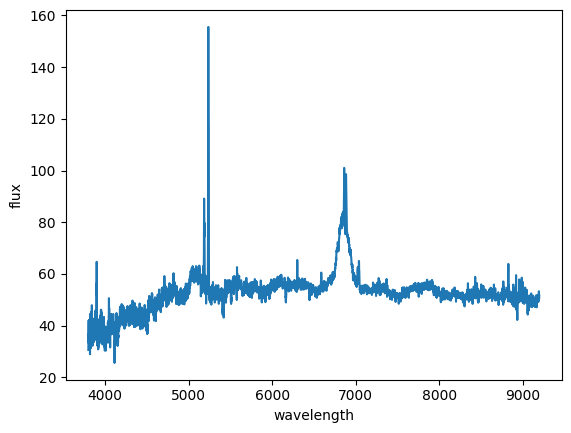

In [42]:
data = spec[0][1].data
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')